# 支持向量机

author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## 1 数据集介绍

Iris 数据集的中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set。Iris 包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息。Iris 数据集是用来给花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征。

#### 1.1 导入数据集

为了了解数据集，我们使用info函数和head函数观测数据整体信息和简单的数据查看


In [2]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2).astype(np.int8)  # Iris virginica
iris_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # 转化为 DataFrame 格式
# 利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
# 进行简单的数据查看，我们可以利用 .head() 头部
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 1.2 划分训练集和测试集

train_test_split方法能够将数据集按照用户的需要指定划分为训练集和测试集，本例我们将训练集和测试集的占比分为7:3，random_state设为1，令每次生成的数据都相同

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 1.3 观察数据集

使用concat函数连接训练集和测试集两个数组（使用该方法前需将对应对象转为DataFrame形式）

In [5]:
pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1).head()

,0,1,target
0,6.9,2.3,0.0
1,1.7,0.3,0.0
2,1.4,0.2,0.0
3,1.4,0.3,0.0
4,3.9,1.4,0.0


## 2 线性支持向量机

建立向量机模型，其基本原理是找到一个超平面作为决策边界，使得不同类别的数据点能够被这个边界清晰地分开。SVM尝试最大化类别之间的边际（即最近的数据点到决策边界的距离），因为较大的边际可以带来更好的泛化能力，有助于提高模型在未知数据上的表现。

### 2.1 模型建立

使用Scikit-learn库中的`SVC`类创建了一个支持向量机分类器，设置 `kernel="linear"` 表示使用线性核函数，`C=1.0` 为正则化参数。

In [6]:
from sklearn.svm import SVC

clf_linear = SVC(kernel="linear", C=1.0)
clf_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 2.2 模型可视化


In [7]:
# 绘制决策边界和点
def make_meshgrid(x, y, h=0.02):
    """创建用于绘制决策边界的网格"""
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """绘制决策边界和边际线"""
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 移除了cmap参数
    out = ax.contour(
        xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k", **params
    )  # 使用colors代替cmap
    return out

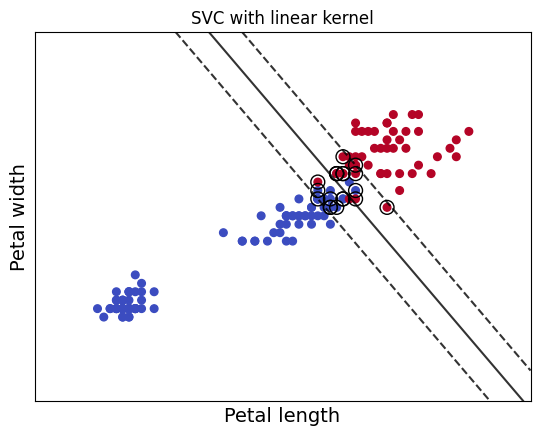

In [8]:
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# 绘制决策边界等
plot_contours(ax, clf_linear, xx, yy, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Petal length")
ax.set_ylabel("Petal width")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with linear kernel")

# 标识出支持向量
ax.scatter(
    clf_linear.support_vectors_[:, 0],
    clf_linear.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

### 2.3 模型预测与评估

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_train_pred = clf_linear.predict(X_train)
y_test_pred = clf_linear.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9718
Test Precision: 0.9556
Train Recall: 0.9714
Test Recall: 0.9556
Train F1: 0.9715
Test F1: 0.9556


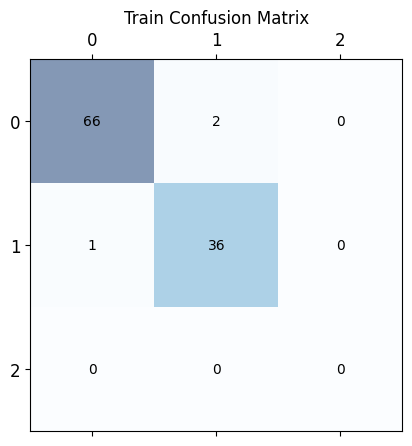

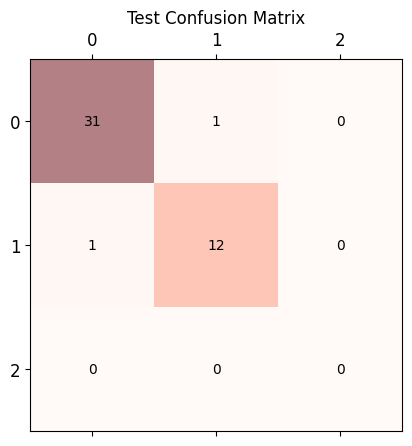

In [10]:
from sklearn.metrics import confusion_matrix


matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")

## 3 RBF 支持向量机

对于那些不能线性分离的数据，SVM可以通过使用核技巧将数据映射到高维空间，使其变得线性可分。支持向量是指那些位于边际边界上的数据点，它们对定义决策边界至关重要。

### 3.1 模型建立

使用Scikit-learn库中的`SVC`类创建了一个支持向量机分类器，设置 `kernel="rbf"` 表示使用径向基函数（RBF）核函数，`C=1.0` 为正则化参数。

In [11]:
clf_rbf = SVC(kernel="rbf", C=1.0)
clf_rbf.fit(X, y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 3.2 模型可视化

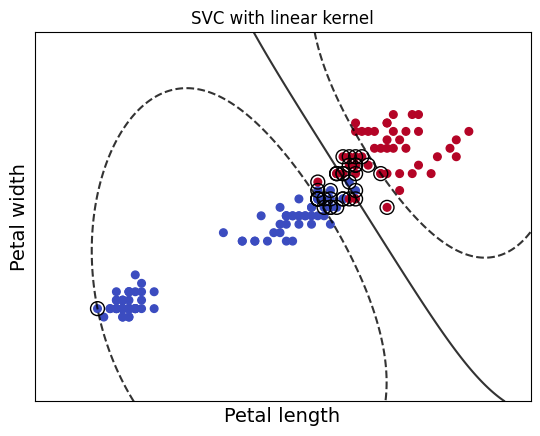

In [12]:
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# 绘制决策边界等
plot_contours(ax, clf_rbf, xx, yy, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Petal length")
ax.set_ylabel("Petal width")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with linear kernel")

# 标识出支持向量
ax.scatter(
    clf_rbf.support_vectors_[:, 0],
    clf_rbf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

### 3.3 模型预测与评估

In [13]:
y_train_pred = clf_rbf.predict(X_train)
y_test_pred = clf_rbf.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9532
Test Precision: 0.9556
Train Recall: 0.9524
Test Recall: 0.9556
Train F1: 0.9519
Test F1: 0.9556


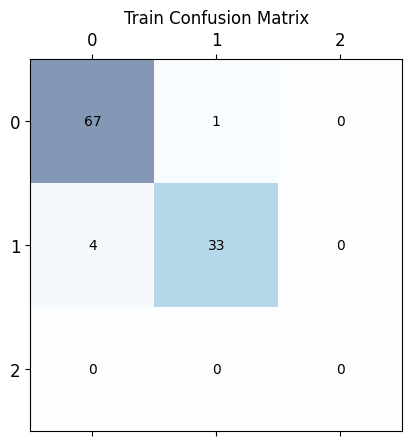

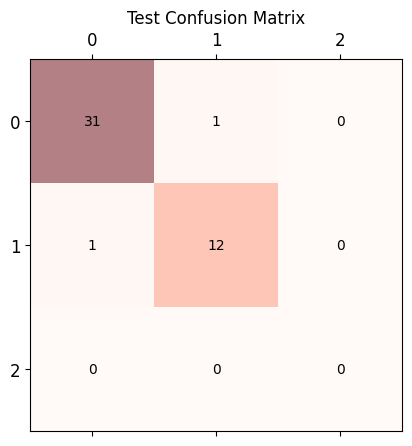

In [14]:
from sklearn.metrics import confusion_matrix


matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")